In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def display_high_number(numbers):
    n = 3
    output = []
    for number in numbers:
        output.append(','.join([str(number)[::-1][i:i+n] for i in range(0, len(str(number)), n)])[::-1])
    return output

# Firefly pixel study

In [3]:
# 312, 271 => veach scene
input_samples = "build/output_samples_p3d.txt"

In [4]:
data_rgb = None
with open(input_samples, 'r') as f:
    lines = f.readlines()
    data_rgb = [ list(map(float, l.split(','))) for l in lines ]

In [5]:
data_rgb = np.array(data_rgb)

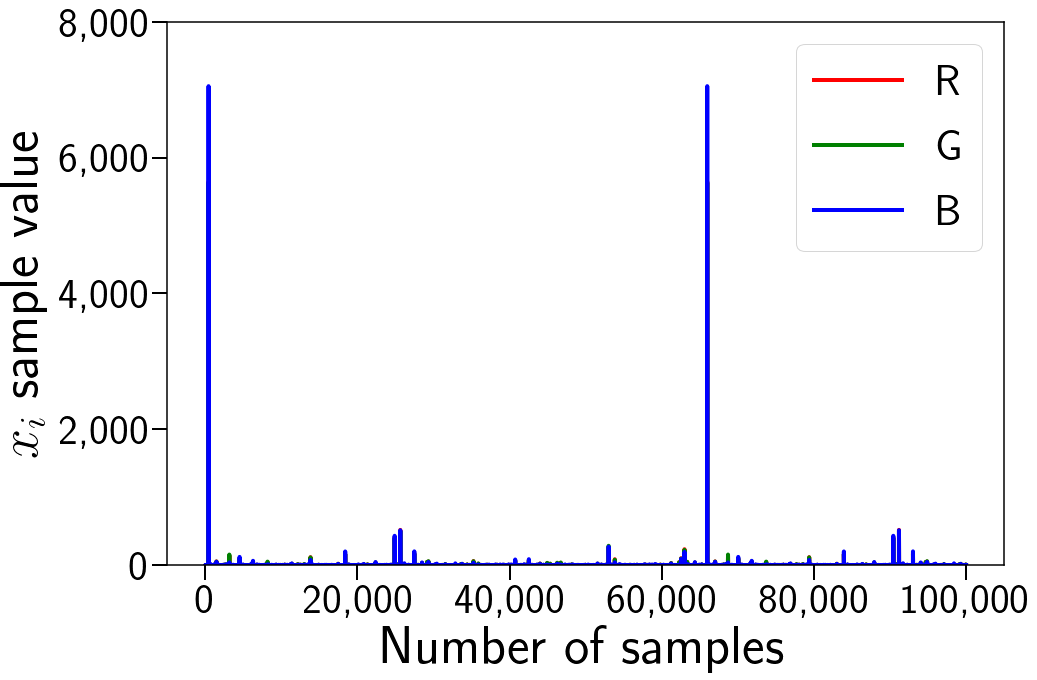

In [7]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'figure.figsize': (15, 10)}

plt.rcParams.update(params)
plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']
for i in range(3):
    plt.plot(data_rgb[:, i], lw=4, label=labels[i], color=labels[i].lower(), alpha=1)
    
plt.xlabel("Number of samples")
plt.ylabel("$x_i$ sample value")
plt.legend(loc='upper right')
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))
plt.yticks(np.arange(0, 12000, step=2000), display_high_number(np.arange(0, 12000, step=2000)))
plt.ylim(0, 8000)
plt.savefig("images/rgb_noisy.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Compute means

In [8]:
# remove of outlier
data_filtered_rgb = []
for i in range(3):
    max_value = np.max(data_rgb[:, i])
    min_value = np.min(data_rgb[:, i])
    data_filtered_rgb.append(np.array(list(map(lambda x: min_value if x == max_value else x , data_rgb[:, i]))))
    
data_filtered_rgb = np.array(data_filtered_rgb)

for i in range(3):
    max_value = np.max(data_filtered_rgb[:, i])
    min_value = np.min(data_filtered_rgb[:, i])
    data_filtered_rgb[i] = np.array(list(map(lambda x: min_value if x == max_value else x , data_filtered_rgb[i])))
    
data_filtered_rgb = np.array(data_filtered_rgb)

In [9]:
def compute_means(samples):
    
    means = []
    samples_sum = 0
    
    for i in range(len(samples)):
        samples_sum += samples[i]
        means.append(samples_sum / (i + 1))
        
    return means

In [10]:
samples_means = []
for i in range(3):
    samples_means.append(compute_means(data_rgb[:, i]))

In [11]:
filter_samples_means = []
for i in range(3):
    filter_samples_means.append(compute_means(data_filtered_rgb[i]))

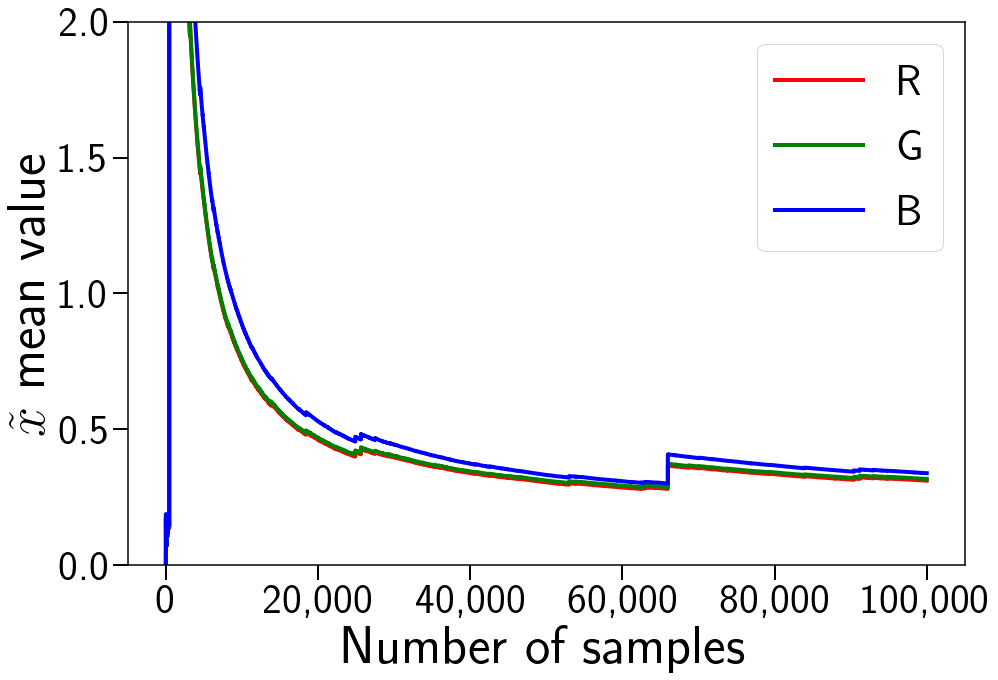

In [13]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'figure.figsize': (15, 10)}

plt.rcParams.update(params)
plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

plt.margins(tight=True)
plt.rcParams.update(params)

labels = ['R', 'G', 'B']

for i in range(3):
    plt.plot(samples_means[i], lw=4, label=labels[i], color=labels[i].lower(), alpha=1)
#plt.plot(filter_samples_means[i], lw=2.5, label="Expected " + labels[i] + " mean (without $\gamma$ correction)", color="gray", alpha=0.8, linestyle="--")
    
plt.xlabel("Number of samples")
plt.ylabel(r"$\tilde{x}$ mean value")

plt.legend()
plt.ylim(0, 2)

#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 2.5, step=0.5), np.arange(0, 2.5, step=0.5))
plt.savefig("images/rgb_means_noisy.png", transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.show()


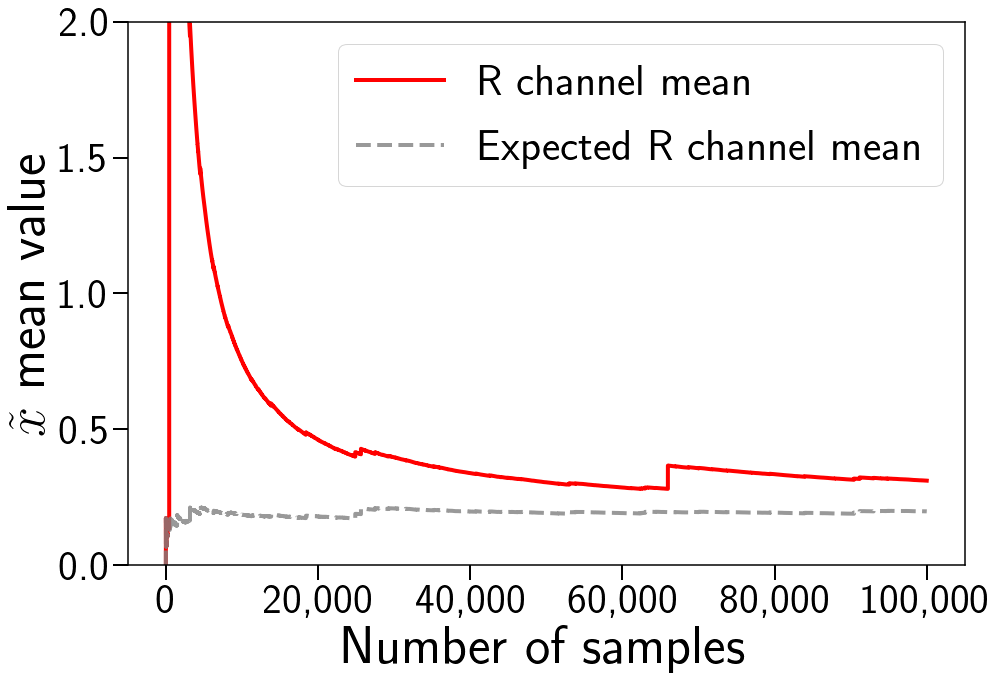

In [15]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'figure.figsize': (15, 10)}

plt.rcParams.update(params)
plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

#for i in range(3):
i = 0
plt.plot(samples_means[i], lw=4, label=labels[i]  + " channel mean", color=labels[i].lower(), alpha=1)
plt.plot(filter_samples_means[i], lw=4, label="Expected " + labels[i] + " channel mean", color="gray", alpha=0.8, linestyle="--")
    
plt.xlabel("Number of samples")
plt.ylabel(r"$\tilde{x}$ mean value")
plt.legend()
plt.ylim(0, 2)
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 2.5, step=0.5), np.arange(0, 2.5, step=0.5))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/rgb_means_noisy_expected.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()


# Gini value from firefly sample

In [16]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [17]:
def create_k_means(samples, k=11):
    
    means = []
    counters = []
    
    for i in range(k):
        means.append(0)
        counters.append(0)
        
    index = 0
    final_means = []
    for s in samples:
        
        means[index] += s
        counters[index] += 1
        
        index += 1
        
        if index >= k:
            index = 0
            
        current_means = []
        for i in range(k):
            
            if counters[i] != 0:
                current_means.append(means[i] / counters[i])
            
        final_means.append(current_means)
    
    return final_means

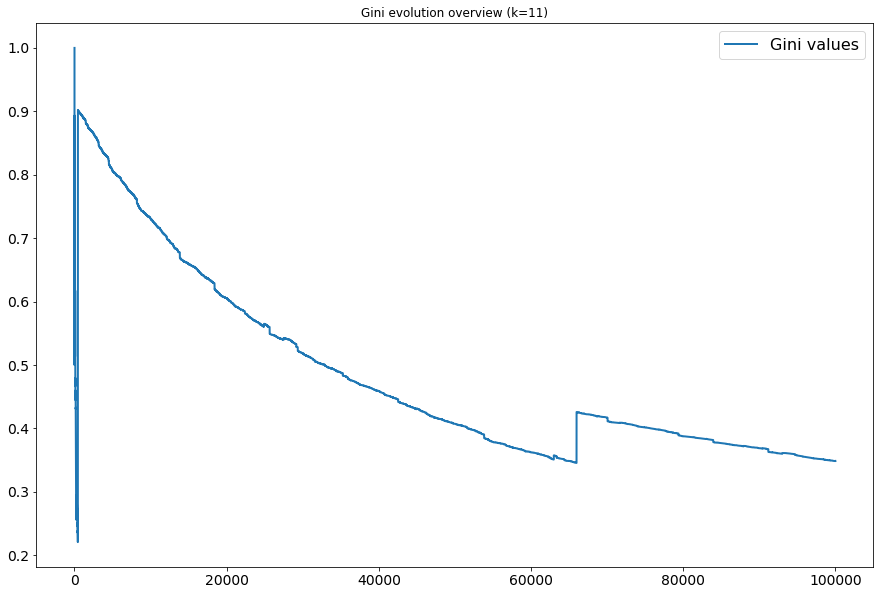

In [139]:
samples_axis_mean = np.mean(data_rgb, axis=1)
means_evolution = create_k_means(samples_axis_mean)

gini_data = [ gini(np.array(m)) for m in means_evolution ]
check_gini_values = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data)))

plt.figure(figsize=(15, 10))
plt.title("Gini evolution overview (k=11)")
plt.plot(check_gini_values, lw=2, label="Gini values")    
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

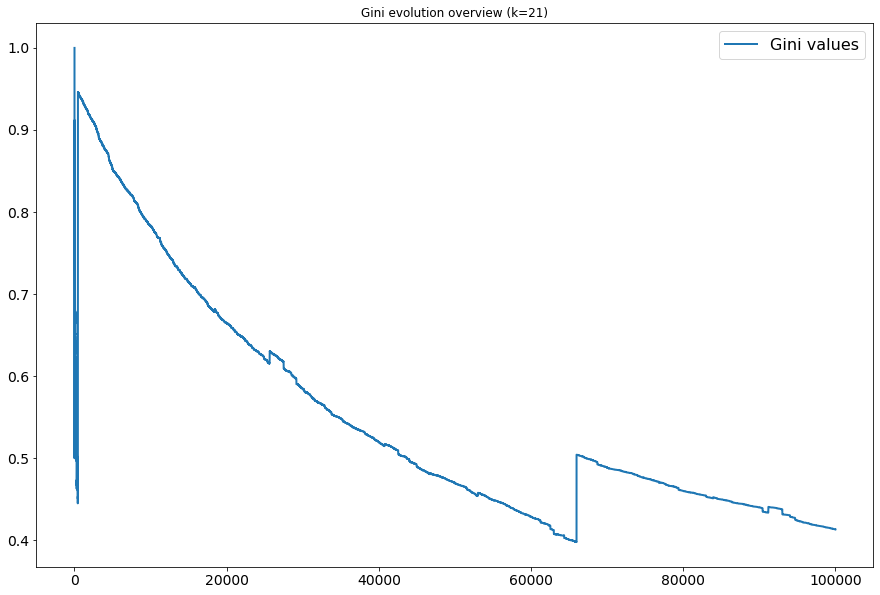

In [140]:
samples_axis_mean = np.mean(data_rgb, axis=1)
means_evolution = create_k_means(samples_axis_mean, k=21)

gini_data = [ gini(np.array(m)) for m in means_evolution ]
check_gini_values = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data)))

plt.figure(figsize=(15, 10))
plt.title("Gini evolution overview (k=21)")
plt.plot(check_gini_values, lw=2, label="Gini values")    
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 0 signifie l'égalité parfaite et 1, qui ne peut être atteint, signifierait une inégalité parfaite 

# Without outlier

In [145]:
samples_axis_mean_filtered = np.mean(data_filtered_rgb, axis=0)

In [146]:
means_evolution_filtered = create_k_means(samples_axis_mean_filtered)

In [147]:
gini_data_filtered = [ gini(np.array(m)) for m in means_evolution_filtered ]
check_gini_values_filtered = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_filtered)))

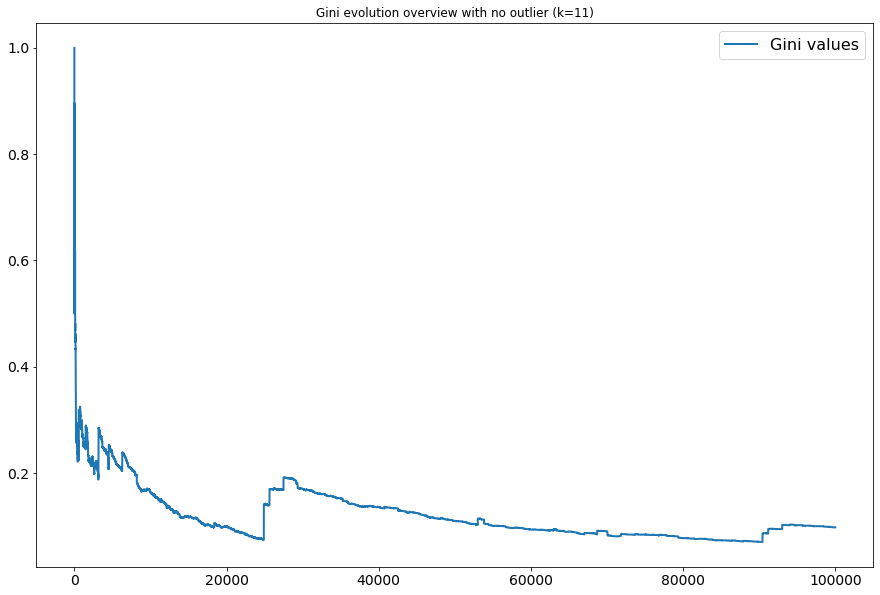

In [148]:
plt.figure(figsize=(15, 10))
plt.title("Gini evolution overview with no outlier (k=11)")
plt.plot(check_gini_values_filtered, lw=2, label="Gini values")    
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [149]:
samples_axis_mean_filtered = np.mean(data_filtered_rgb, axis=0)

In [150]:
means_evolution_filtered = create_k_means(samples_axis_mean_filtered, k=21)

In [151]:
gini_data_filtered = [ gini(np.array(m)) for m in means_evolution_filtered ]
check_gini_values_filtered = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_filtered)))

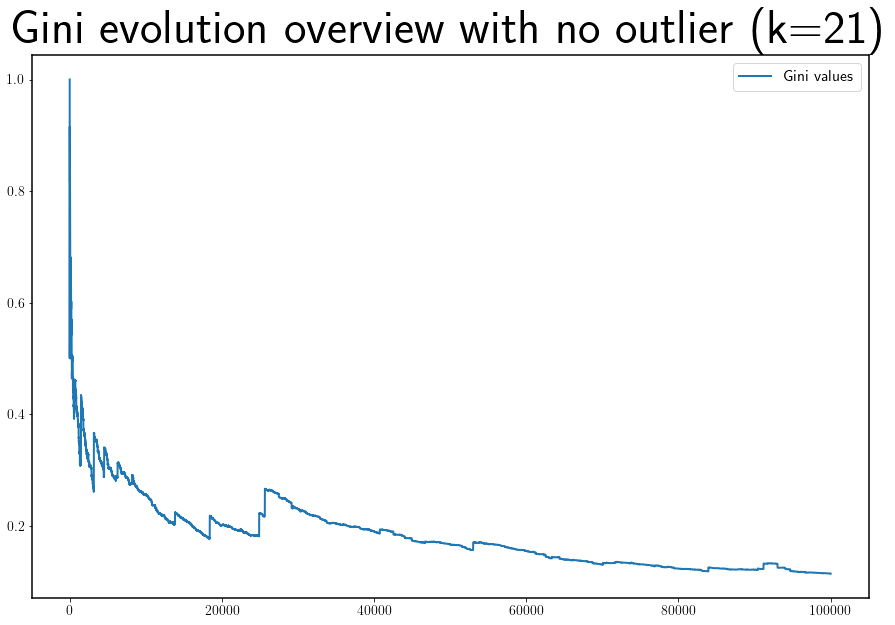

In [319]:
plt.figure(figsize=(15, 10))
plt.title("Gini evolution overview with no outlier (k=21)")
plt.plot(check_gini_values_filtered, lw=2, label="Gini values")    
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Display Statistics values

In [18]:
def prepare_mode_data(samples):
    return [ float(f'{s:.2f}') for s in samples]

In [19]:
data_reduced_rgb = []

for i in range(3):
    samples = []
    data_reduced_rgb.append(prepare_mode_data(data_filtered_rgb[i]))
    
data_reduced_rgb = np.array(data_reduced_rgb)

In [20]:
mode_value = stats.mode(data_reduced_rgb[0])[0][0]
median_value = np.median(data_reduced_rgb[0])
mean_value = np.mean(data_reduced_rgb[0])

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


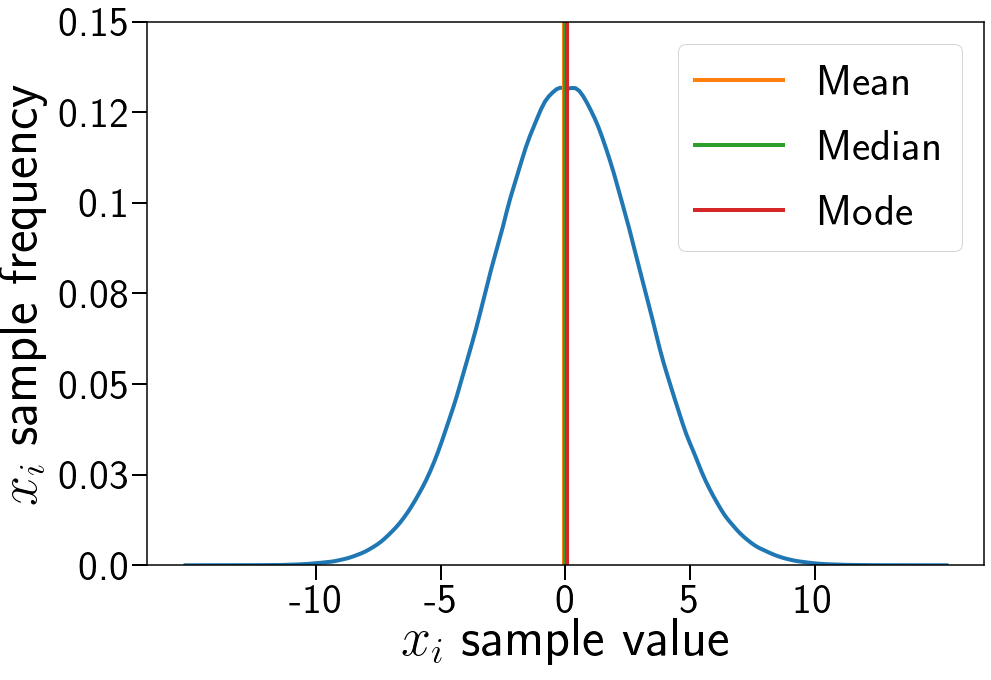

In [160]:
import seaborn as sns

samples = np.random.normal(loc=0, scale=3.0, size=10000)

data = samples

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (15, 10)}

samples = np.random.normal(loc=0, scale=3.0, size=1000000)

plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

#for i in range(3):
sns.distplot(samples, hist=False, norm_hist=True)

prepared_samples = prepare_mode_data(samples)
mode_value = stats.mode(prepared_samples)[0][0]
median_value = np.median(prepared_samples[0])
mean_value = np.mean(prepared_samples[0])

plt.plot([-0.05, -0.05], [0, 1], label='Mean', linewidth=4)
plt.plot([0, 0], [0, 1], label='Median', linewidth=4)
plt.plot([+0.05, +0.05], [0, 1], label='Mode', linewidth=4)
#plt.ylim(0, 0.10)
#plt.xlim(-1, 100)
        
plt.xlabel("$x_i$ sample value")
plt.ylabel(r"$x_i$ sample frequency")
plt.ylim(0, 0.15)
plt.legend()
plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.yticks(np.arange(0, 0.175, step=0.025), prepare_mode_data(np.arange(0, 0.175, step=0.025)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/normal_distribution.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


0.14941804131966682


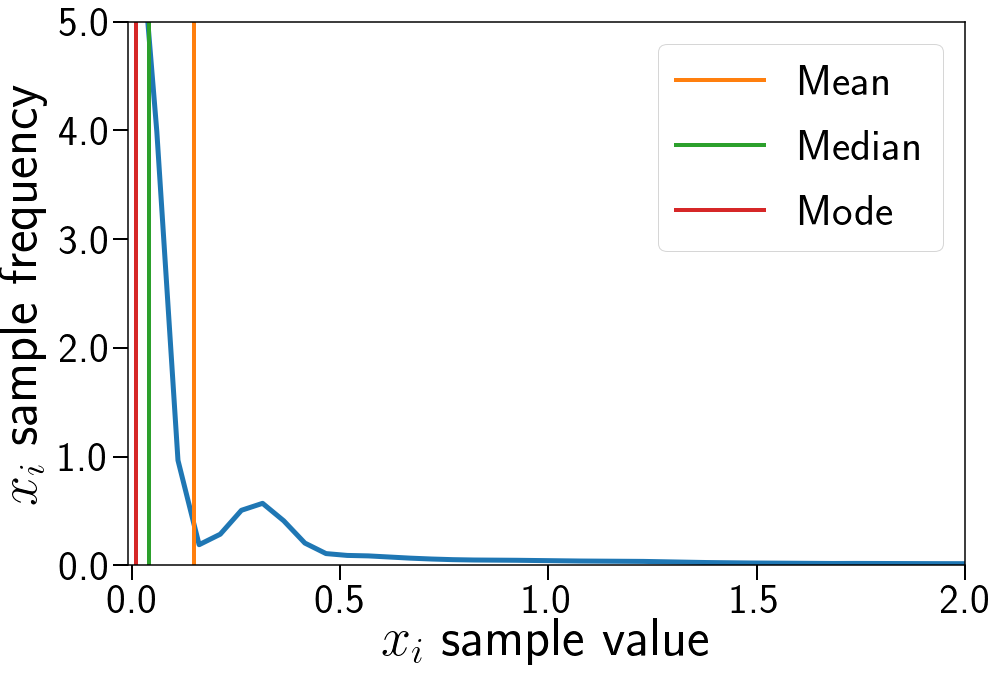

In [159]:
import seaborn as sns

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 5,
          'figure.figsize': (15, 10)}

samples = np.random.normal(loc=0, scale=3.0, size=1000000)

plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

#for i in range(3):
# filtered distribution
samples = np.array(data_reduced_rgb[0])
samples += 0.01
samples = [s for s in samples if s < 10]

mode_value = stats.mode(samples)[0][0]
median_value = np.median(samples)
mean_value = np.mean(samples)


sns.distplot(np.array(samples), hist=False, norm_hist=True)
print(np.mean(samples))

plt.plot([mean_value, mean_value], [0, 5], label='Mean', linewidth=4)
plt.plot([median_value + 0.03, median_value + 0.03], [0, 5], label='Median', linewidth=4)
plt.plot([mode_value, mode_value], [0, 5], label='Mode', linewidth=4)

#plt.xlim(-1, 100)
        
plt.xlabel("$x_i$ sample value")
plt.ylabel(r"$x_i$ sample frequency")
#plt.ylim(0, 0.15)
plt.xlim(-0.01, 2)
plt.ylim(0, 5)
plt.legend()
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 2.5, step=0.5), np.arange(0, 2.5, step=0.5))
plt.yticks(np.arange(0, 5.5, step=1), prepare_mode_data(np.arange(0, 5.5, step=1)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/r_channel_distribution.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

### Compare mean, median and mode

In [67]:
samples_axis_mean_filtered = np.mean(data_filtered_rgb[0])

In [68]:
means_evolution_filtered_k11 = create_k_means(data_filtered_rgb[0], k=11)
means_evolution_filtered_k21 = create_k_means(data_filtered_rgb[0], k=21)

In [69]:
means = [ np.mean(m) for m in means_evolution_filtered_k11 ]

In [70]:
MON_k11 = [ np.median(m) for m in means_evolution_filtered_k11 ]
MON_k21 = [ np.median(m) for m in means_evolution_filtered_k21 ]

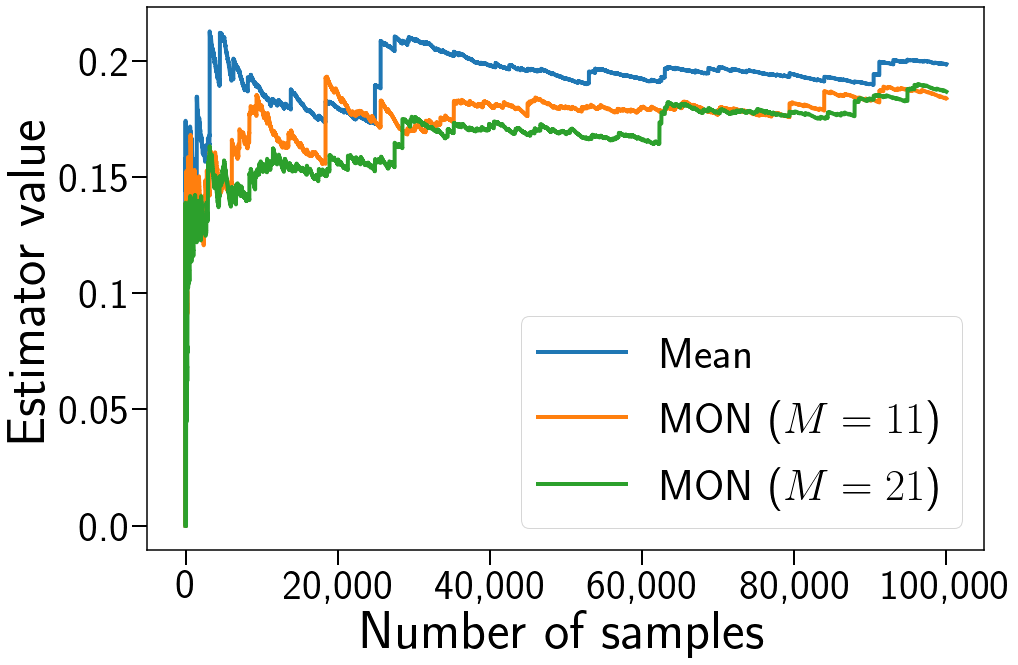

In [71]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (15, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

plt.plot(means, label='Mean', linewidth=4)
plt.plot(MON_k11, label='MON ($M=11$)', linewidth=4)
plt.plot(MON_k21, label='MON ($M=21$)', linewidth=4)
#plt.xlim(-1, 100)
        
plt.xlabel("Number of samples")
plt.ylabel(r"Estimator value")
#plt.ylim(0, 0.15)
#plt.xlim(-0.03, 6)
#plt.ylim(0.15, 0.20)
plt.legend()
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 0.25, step=0.05), prepare_mode_data(np.arange(0, 0.25, step=0.05)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/estimators_no_outlier.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [162]:
samples_axis_mean = np.mean(data_rgb[:, 0])

In [163]:
means_evolution_k11 = create_k_means(data_rgb[:, 0], k=11)
means_evolution_k21 = create_k_means(data_rgb[:, 0], k=21)

In [164]:
means = [ np.mean(m) for m in means_evolution_k11 ]

In [165]:
MON_k11 = [ np.median(m) for m in means_evolution_k11 ]
MON_k21 = [ np.median(m) for m in means_evolution_k21 ]

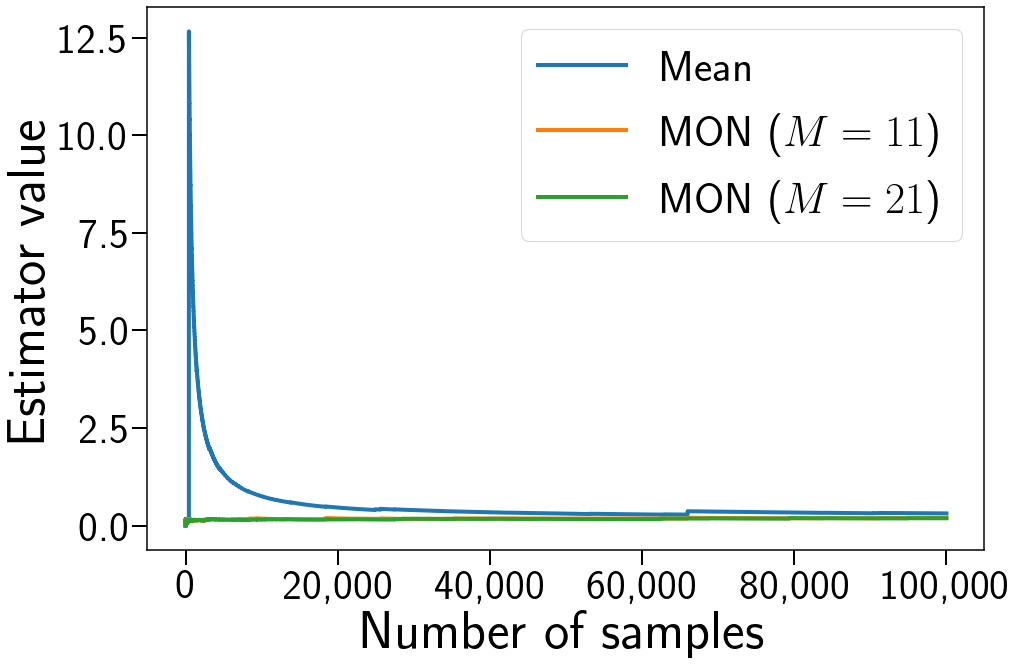

In [166]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (15, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

plt.plot(means, label='Mean', linewidth=4)
plt.plot(MON_k11, label='MON ($M=11$)', linewidth=4)
plt.plot(MON_k21, label='MON ($M=21$)', linewidth=4)
#plt.xlim(-1, 100)
        
plt.xlabel("Number of samples")
plt.ylabel(r"Estimator value")
#plt.ylim(0, 0.15)
#plt.xlim(-0.03, 6)
#plt.ylim(0.15, 0.20)
plt.legend()
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 15, step=2.5), prepare_mode_data(np.arange(0, 15, step=2.5)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/estimators_outliers.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

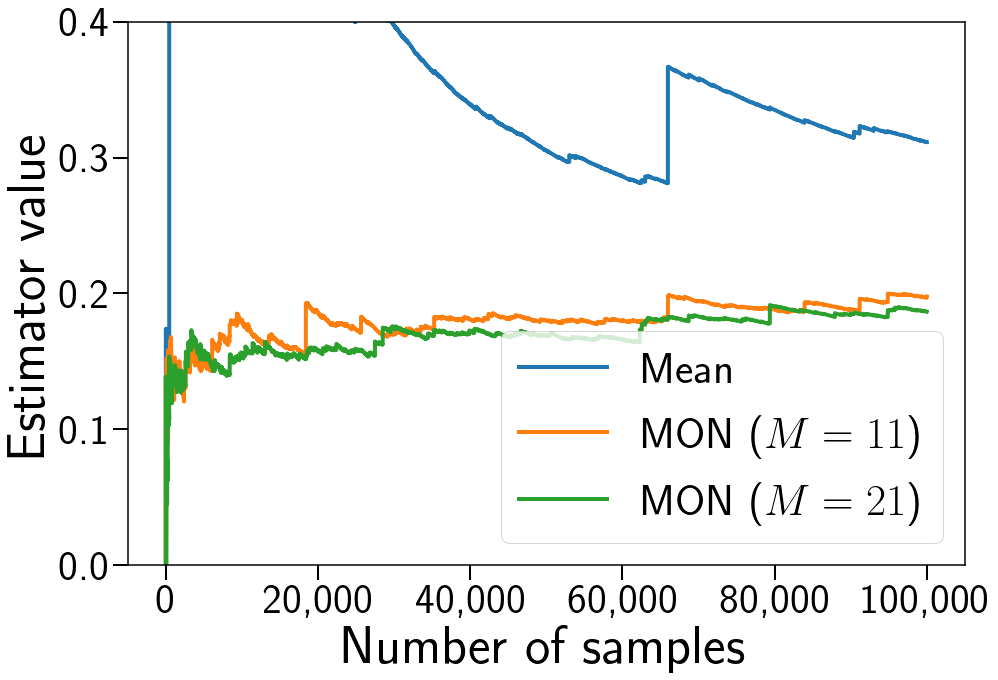

In [167]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (15, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

plt.plot(means, label='Mean', linewidth=4)
plt.plot(MON_k11, label='MON ($M=11$)', linewidth=4)
plt.plot(MON_k21, label='MON ($M=21$)', linewidth=4)
#plt.xlim(-1, 100)
        
plt.xlabel("Number of samples")
plt.ylabel(r"Estimator value")
#plt.ylim(0, 0.15)
#plt.xlim(-0.03, 6)
plt.ylim(0, 0.4)
plt.legend()
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 0.45, step=0.1), prepare_mode_data(np.arange(0, 0.45, step=0.1)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/estimators_outliers_scale.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Alpha-MON study

In [181]:
def alpha_mon(means, alpha=0.5):
    
    n = len(means)
    mIndex = int(len(means) / 2)
    
    meanSum = means[mIndex]
    weightSum = 1
    
    for i in range(1, mIndex + 1):
        print(f'{means[mIndex - i]} -- {means[mIndex + i]}')

In [180]:
alpha_mon([1, 2, 3, 4, 5])

2 -- 4
1 -- 5
